In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_excel("TASK2- DATA.xlsx")


In [3]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,NaN
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,89,NaN,NaN,NaN
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano
3,2024-12-13 00:00:00,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar


In [4]:
df.shape

(1564, 13)

In [5]:
df.isnull().describe()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564
unique,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,1511,1497,1507,1498,1504,1508,1500,1500,1435,1500,1507,1475,1012


In [6]:
df.isnull().mean()*100

Season               3.388747
Competition          4.283887
Matchday             3.644501
Date                 4.219949
Venue                3.836317
Club                 3.580563
Opponent             4.092072
Result               4.092072
Playing_Position     8.248082
Minute               4.092072
At_score             3.644501
Type                 5.690537
Goal_assist         35.294118
dtype: float64

In [7]:
df.isnull().value_counts()

Season  Competition  Matchday  Date   Venue  Club   Opponent  Result  Playing_Position  Minute  At_score  Type   Goal_assist
False   False        False     False  False  False  False     False   False             False   False     False  False          946
                                                                                                                 True           445
                                                                      True              False   False     False  False           30
                                                                                                                 True            21
                                                                      False             False   False     True   False            6
                                                                                                                               ... 
        True         True      False  False  True   True      False   True         

<Axes: >

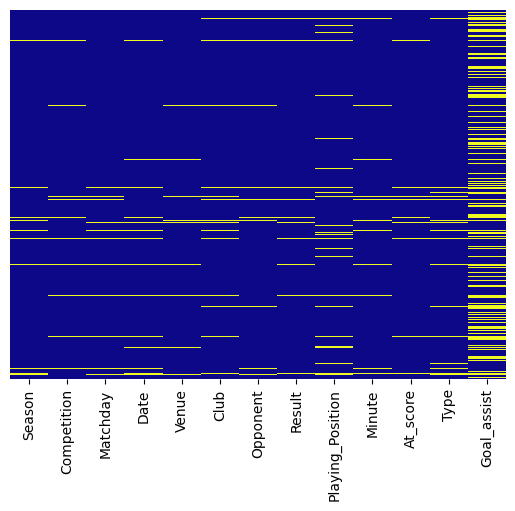

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [9]:
def get_null_percent(df,columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_count=df[col].isnull().sum()
            tot_count=len(df)
            null_percent=(null_count/tot_count)*100
            result[col]=round(null_percent,2)
        else:
            result[col]="Column Not Found"
    return result

col_check=['Competition','Matchday','Venue','Club','Playing_Position','Type']
null_percentages=get_null_percent(df,col_check)
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

Competition: 4.28%
Matchday: 3.64%
Venue: 3.84%
Club: 3.58%
Playing_Position: 8.25%
Type: 5.69%


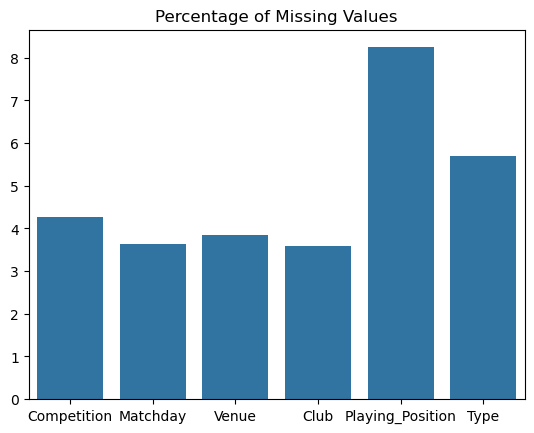

In [10]:
sns.barplot(data=null_percentages).set(title="Percentage of Missing Values")
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1511 non-null   object
 1   Competition       1497 non-null   object
 2   Matchday          1507 non-null   object
 3   Date              1498 non-null   object
 4   Venue             1504 non-null   object
 5   Club              1508 non-null   object
 6   Opponent          1500 non-null   object
 7   Result            1500 non-null   object
 8   Playing_Position  1435 non-null   object
 9   Minute            1500 non-null   object
 10  At_score          1507 non-null   object
 11  Type              1475 non-null   object
 12  Goal_assist       1012 non-null   object
dtypes: object(13)
memory usage: 159.0+ KB


In [12]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,NaN
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,89,NaN,NaN,NaN
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano
3,2024-12-13 00:00:00,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar


In [13]:
df['Competition'].value_counts()

Competition
LaLiga                              831
UEFA Champions League               282
Premier League                      108
Serie A                              88
Copa del Rey                         80
Ligue 1                              25
Supercopa                            19
FA Cup                               14
FIFA Club World Cup                  12
Saudi Pro League                     10
UEFA Super Cup                        6
EFL Cup                               4
Italy Cup                             4
Liga Portugal                         4
Europa League                         2
Taca de Portugal Placard              2
Supercoppa Italiana                   2
Trophée des Champions                 1
Champions League                      1
Troph�e des Champions                 1
UEFA Champions League Qualifying      1
Name: count, dtype: int64

In [14]:
# comp_mode=df['Competition'].mode()
# df['Competition']=df['Competition'].fillna(comp_mode,inplace=True)

In [15]:
df.dropna(subset=['Competition','Matchday','Venue','Club','Playing_Position','Type'], inplace=True)

Since the missing values of above mentioned columns are less than 10%.Therefore, we will drop the rows having null values.

In [16]:
df.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  0
Goal_assist         445
dtype: int64

In [17]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,NaN
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano
3,2024-12-13 00:00:00,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar
5,15/16,UEFA Champions League,last 16,O3-O8-16,H,Real Madrid,AS Roma,2:OO,CF,64,1:OO,Right-footed shot,Lucas Vazquez


In [18]:
df.drop(['Season','Date','At_score'],axis=1)

,Competition,Matchday,Venue,Club,Opponent,Result,Playing_Position,Minute,Type,Goal_assist
0,LaLiga,26,H,FC Barcelona,Sevilla FC,2:O1,RW,31,Direct free kick,NaN
2,LaLiga,25,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,Header,Javier Mascherano
3,LaLiga,36,H,Real Madrid,Malaga CF,6:O2,LW,26,Right-footed shot,Xabi Alonso
4,UEFA Champions League,Group Stage,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,Left-footed shot,Neymar
5,UEFA Champions League,last 16,H,Real Madrid,AS Roma,2:OO,CF,64,Right-footed shot,Lucas Vazquez
...,...,...,...,...,...,...,...,...,...,...
1559,Serie A,36,A,Juventus FC,US Sassuolo,1:O3,CF,45,Left-footed shot,NaN
1560,UEFA Champions League,Group Stage,A,Real Madrid,Ajax Amsterdam,1:O4,LW,79,Right-footed shot,Karim Benzema
1561,LaLiga,22,A,FC Barcelona,Athletic Bilbao,2:O5,RW,15,Direct free kick,NaN
1562,Serie A,27,A,Juventus FC,Cagliari Calcio,1:O3,CF,32,Left-footed shot,Federico Chiesa


<Axes: xlabel='count', ylabel='Competition'>

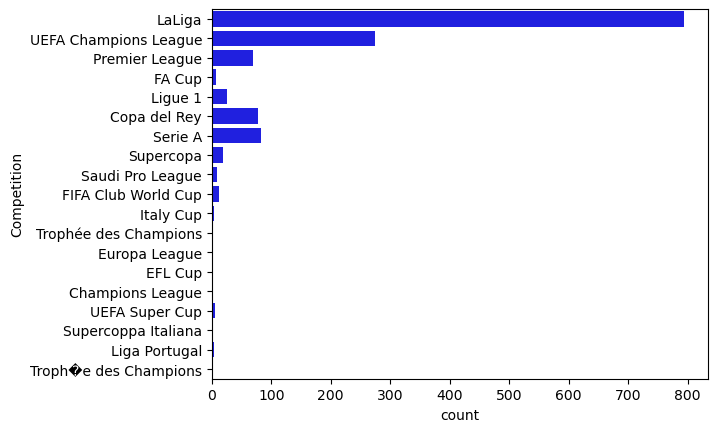

In [19]:
sns.countplot(df['Competition'],color='blue')

This countplot of various competition shows that majorly LaLiga is played more.

Rest all are played very less.

Also competitions like Italy Cup,Liga Portugal,etc... are played very very less nearly around zero

<Axes: xlabel='Venue', ylabel='Competition'>

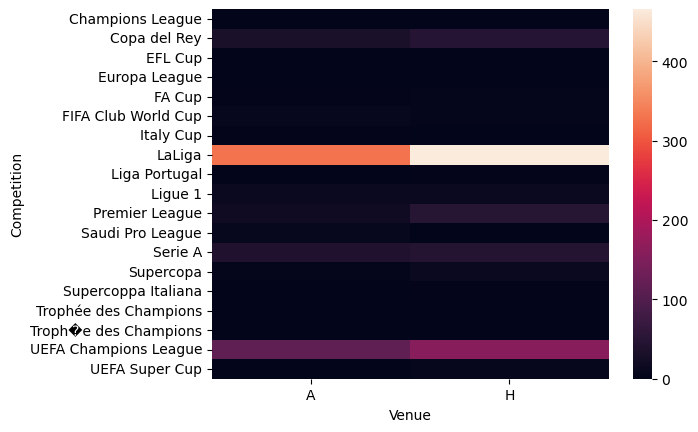

In [20]:
sns.heatmap(pd.crosstab(df['Competition'],df['Venue']))

In [21]:
df['Venue'].value_counts()

Venue
H    815
A    576
Name: count, dtype: int64

OBSERVATION.

1.Above heatmap shows that more number of matches played in LaLiga competition are from Venue A and comparatively less from venue H

2.In UEFA Champions League more matches are played at venue H than venue A

Text(0.5, 1.0, 'Clubs Distribution')

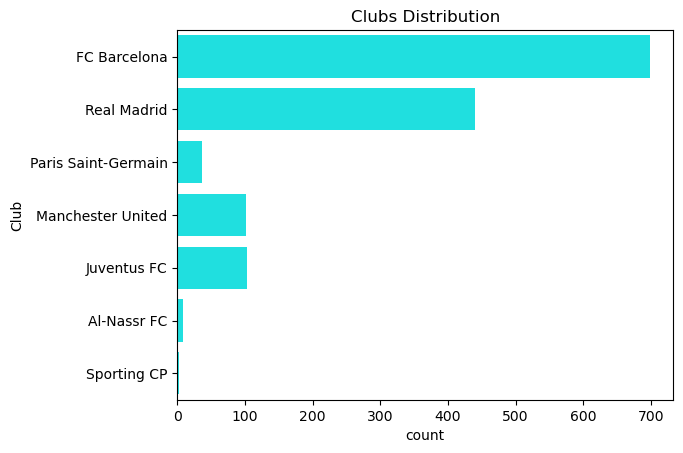

In [22]:
sns.countplot(df['Club'],color='cyan').set_title("Clubs Distribution")

Frequency count of FC Barcelona is more(highest) where as that of Al-Nassr FC and Sporting CP is least

<Axes: xlabel='Venue', ylabel='Club'>

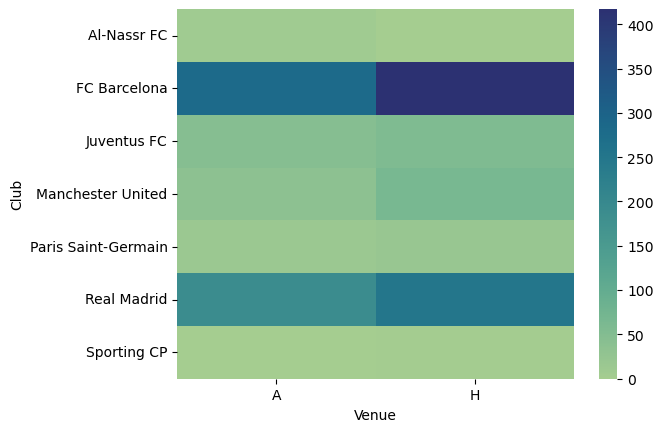

In [23]:
sns.heatmap(pd.crosstab(df['Club'],df['Venue']),cmap='crest',linecolor='black')

OBSERVATION

Majority of the club's venue is H as compared to that of venue H

<Axes: ylabel='Playing_Position'>

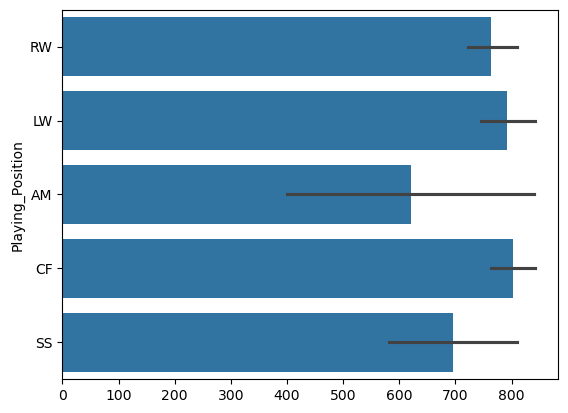

In [24]:
sns.barplot(df['Playing_Position'])

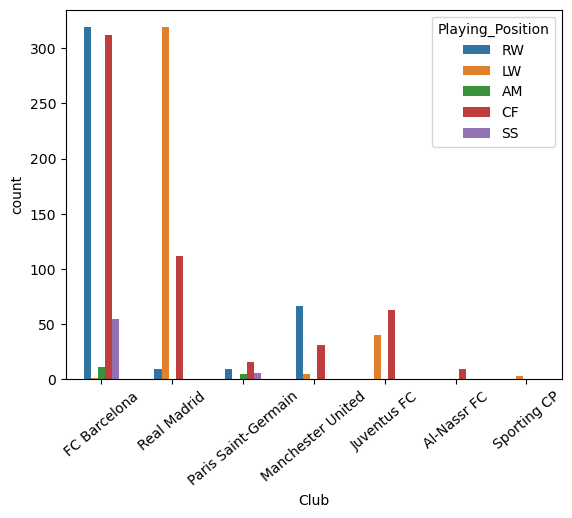

In [25]:
ax=sns.countplot(df,x='Club',hue='Playing_Position',width=0.5)
plt.xticks(rotation=40)
plt.show()

OBSERVATIONS

1.In FC Barcelona and Manchester United most frequent player position is RW position followed by CF.

2.In Real Madrid, LW position is more and then CF position.

3.In Paris Saint-Germain and Juventus FC position CF is more.

4.Also in FC Barcelona even though more players population is there,still compared to that count of position LW is neglibile(near to zero).


<Axes: ylabel='Type'>

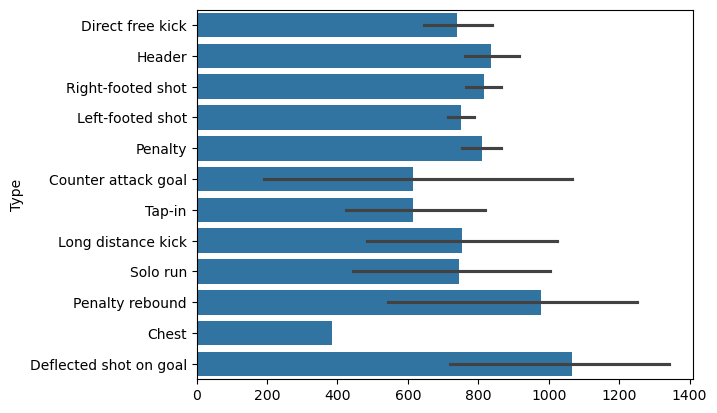

In [26]:
sns.barplot(df['Type'])

In [27]:
count_type=df['Type'].value_counts()
count_type

Type
Left-footed shot          565
Right-footed shot         324
Penalty                   213
Header                    135
Direct free kick           99
Tap-in                     22
Long distance kick         10
Counter attack goal         6
Solo run                    6
Penalty rebound             5
Deflected shot on goal      5
Chest                       1
Name: count, dtype: int64

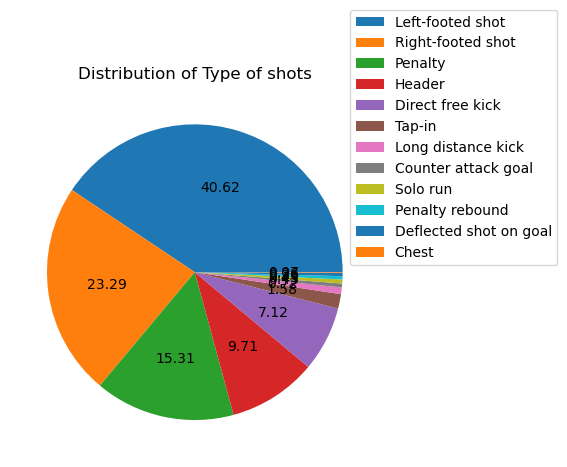

In [28]:
plt.pie(count_type,autopct='%.2f')
plt.legend(labels=['Left-footed shot ','Right-footed shot','Penalty','Header','Direct free kick','Tap-in','Long distance kick','Counter attack goal','Solo run','Penalty rebound','Deflected shot on goal','Chest'], loc='lower right', bbox_to_anchor=(1.5, 0.5))
plt.title('Distribution of Type of shots')
plt.show()


OBSERVATION

1. Almost 40% of players plays Left footed shot and 23% player plays with right footed shot.
2. 15.3% is played by penalty and 9.7% by Header.
3. And rest 21% is of other different shots.